In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


The dataset that i've chosen comes from Kaggle and provides information about houses including their price(https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data/)

Based on the histogram of house prices, I create my own class, that divides the houses into the cheap, middle and high price. 

In [ ]:
df=pd.read_csv('/work/housing_price_dataset.csv', encoding='latin1')

        
X = df[:200]

#y = df['Neighborhood'][:100]
    

df['price_class']=df['Price']

df['price_class']=np.where(df['price_class']<=150000, 0,df['price_class'])
df['price_class']=np.where((150000<df['price_class']) & (df['price_class']<=300000), 1,df['price_class'])
df['price_class']=np.where(300000<=df['price_class'], 2,df['price_class'])
df['price_class']=df['price_class'].astype(int)
y=df['price_class'][:200]

The dataset has 6 variables, they indicate the number of bedrooms and bathrooms, the year of building, the square area of the house, the neighborhood and the price of the house. All of them are numerical except for the neighborhood variable. 

In [ ]:
X

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
195,2714,4,3,Rural,1999,290954.491815
196,2598,3,3,Urban,2020,207377.555455
197,1863,4,3,Suburb,1990,267934.092570
198,1742,5,1,Urban,1993,235034.899838


These variables, have the following correlations. 

In [ ]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.061692,-0.031465,0.011228,-0.015500,0.704859
Bedrooms,-0.061692,1.000000,-0.009524,0.029997,-0.139903,-0.006541
Bathrooms,-0.031465,-0.009524,1.000000,0.060726,0.064183,0.105745
Neighborhood,0.011228,0.029997,0.060726,1.000000,0.032853,0.058695
YearBuilt,-0.015500,-0.139903,0.064183,0.032853,1.000000,0.011221
Price,0.704859,-0.006541,0.105745,0.058695,0.011221,1.000000


We are interested in creating a class that will allow us to classify the houses. I decided to look at the histogram of the prices and arbitrarly divide them.

[]

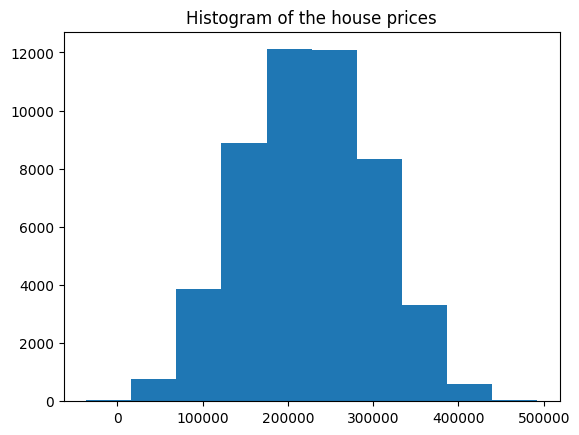

In [ ]:
plt.hist(df['Price'])
plt.title('Histogram of the house prices')
plt.plot()

[]

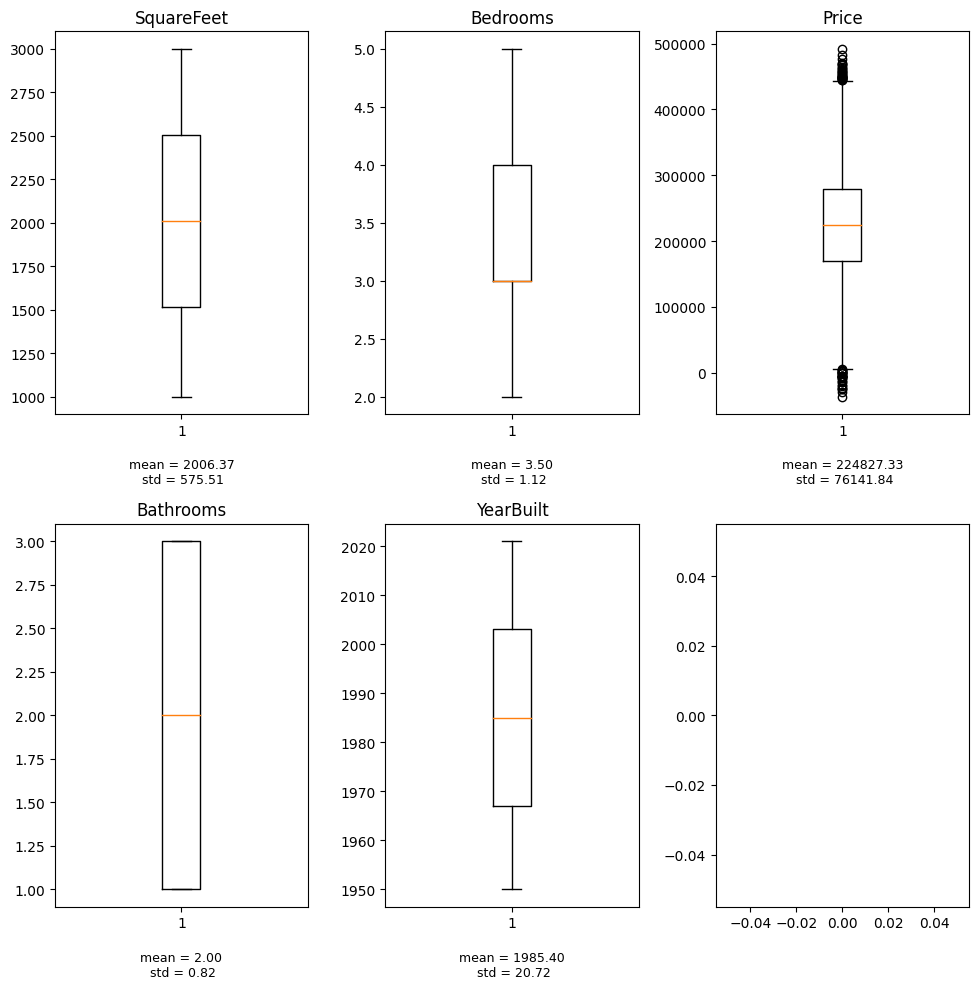

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(10, 10))


ax[0,0].boxplot((df['SquareFeet']))
ax[0,0].set_title('SquareFeet')
ax[0,0].set_xlabel(f'\n mean = {df["SquareFeet"].mean():.2f} \n std = {df["SquareFeet"].std():.2f}', fontsize = 9)

ax[0,1].boxplot((df['Bedrooms']))
ax[0,1].set_title('Bedrooms')
ax[0,1].set_xlabel(f'\n mean = {df["Bedrooms"].mean():.2f} \n std = {df["Bedrooms"].std():.2f}', fontsize = 9)

ax[1,0].boxplot((df['Bathrooms']))
ax[1,0].set_title('Bathrooms')
ax[1,0].set_xlabel(f'\n mean = {df["Bathrooms"].mean():.2f} \n std = {df["Bathrooms"].std():.2f}', fontsize = 9)

ax[1,1].boxplot((df['YearBuilt']))
ax[1,1].set_title('YearBuilt')
ax[1,1].set_xlabel(f'\n mean = {df["YearBuilt"].mean():.2f} \n std = {df["YearBuilt"].std():.2f}', fontsize = 9)

ax[0,2].boxplot((df['Price']))
ax[0,2].set_title('Price')
ax[0,2].set_xlabel(f'\n mean = {df["Price"].mean():.2f} \n std = {df["Price"].std():.2f}', fontsize = 9)

fig.tight_layout()
plt.plot()

From the boxplots, we can see that the only variable with outliers is Price. As for the Bathrooms and Bedrooms variables, the boxplot didn't provide much insight, since the variables have a limited range of specific values.

In [ ]:
#rescalling the data
X_scal=X.copy()

scaler=StandardScaler().fit(X_scal)

X_scal=scaler.transform(X_scal)

X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.2, random_state=42)


Below are the implementations of the models performed in a loop, all of the results of the models are in the output cell.


Logistic Regression:

Confusion Matrix:
 [[ 9  1  0]
 [ 1 27  0]
 [ 0  0  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.96      0.96      0.96        28
           2       1.00      1.00      1.00         2

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40


SVM:

Confusion Matrix:
 [[10  0  0]
 [ 1 24  3]
 [ 0  1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.96      0.86      0.91        28
           2       0.25      0.50      0.33         2

    accuracy                           0.88        40
   macro avg       0.71      0.79      0.73        40
weighted avg       0.91      0.88      0.89        40


KNN:

Confusion Matrix:
 [[ 6  4  0]
 [ 2 24 

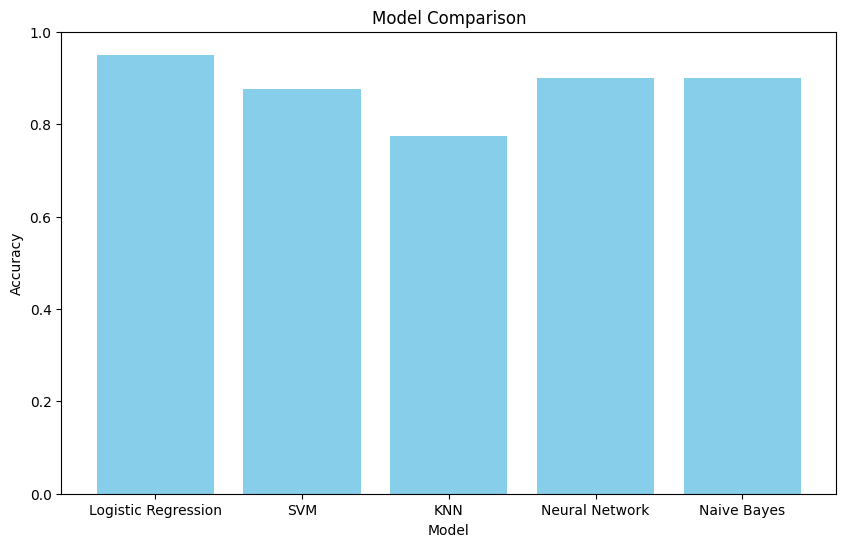

In [ ]:


# List of models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(),
    'Naive Bayes': GaussianNB()
}

# Model training and evaluation
results = {'Model': [], 'Accuracy': []}

for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test,y_pred)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)

    # Confusion Matrix and Classification Report
    print(f"\n{name}:\n")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Accuracy'], color='skyblue')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

## 

Below are the models with their parameters tuned by gridsearchcv and their respective metrics. 

In [ ]:
results1 = {'Model': [], 'Accuracy': []}


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
params1=[{'solver': ['newton-cg', 'lbfgs'],
         'penalty':['l1','l2', 'none'],
         'C':[0.1,1, 10]}]
log_reg=LogisticRegression()
log_reg_clf=GridSearchCV(log_reg, params1)


log_reg_clf.fit(X_train, y_train)

# Predictions
y_pred = log_reg_clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
results1['Model'].append('Logistic Regression')
results1['Accuracy'].append(accuracy)

# Confusion Matrix and Classification Report
print("Logistic Regression")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(log_reg_clf.best_params_)

Logistic Regression
Confusion Matrix:
 [[10  0  0]
 [ 0 27  1]
 [ 0  0  2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.96      0.98        28
           2       0.67      1.00      0.80         2

    accuracy                           0.97        40
   macro avg       0.89      0.99      0.93        40
weighted avg       0.98      0.97      0.98        40

{'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}


In [ ]:
params2=[{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
         'C':[0.1,1, 10],
         'degree':[2,3,4]}]
SVM=SVC()
SVM_clf=GridSearchCV(SVM, params2)


SVM_clf.fit(X_train, y_train)

# Predictions
y_pred = SVM_clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
results1['Model'].append('SVM')
results1['Accuracy'].append(accuracy)

# Confusion Matrix and Classification Report
print("SVM")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(SVM_clf.best_params_)

SVM
Confusion Matrix:
 [[ 9  1  0]
 [ 1 27  0]
 [ 0  1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.93      0.96      0.95        28
           2       1.00      0.50      0.67         2

    accuracy                           0.93        40
   macro avg       0.94      0.79      0.84        40
weighted avg       0.93      0.93      0.92        40

{'C': 1, 'degree': 2, 'kernel': 'linear'}


In [ ]:
params3=[{'weights':['uniform','distance'],
         'n_neighbors':[3,5,7,9]}]
knn=KNeighborsClassifier()
knn_clf=GridSearchCV(knn, params3)


knn_clf.fit(X_train, y_train)

# Predictions
y_pred = knn_clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
results1['Model'].append('KNN')
results1['Accuracy'].append(accuracy)

# Confusion Matrix and Classification Report
print("KNN")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(knn_clf.best_params_)

KNN
Confusion Matrix:
 [[ 6  4  0]
 [ 2 24  2]
 [ 0  1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.83      0.86      0.84        28
           2       0.33      0.50      0.40         2

    accuracy                           0.78        40
   macro avg       0.64      0.65      0.64        40
weighted avg       0.78      0.78      0.78        40

{'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
params4=[{'hidden_layer_sizes':[(10,),(50,),(100,),(200,)],
         'activation':['logistic', 'tanh', 'relu'],
         'solver': ['sdg', 'lbfgs','adam']}]
NN=MLPClassifier()
NN_clf=GridSearchCV(NN, params4)


NN_clf.fit(X_train, y_train)

# Predictions
y_pred = NN_clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
results1['Model'].append('Neural Network')
results1['Accuracy'].append(accuracy)

# Confusion Matrix and Classification Report
print("Neural network")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(NN_clf.best_params_)

Neural network
Confusion Matrix:
 [[10  0  0]
 [ 0 27  1]
 [ 0  0  2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.96      0.98        28
           2       0.67      1.00      0.80         2

    accuracy                           0.97        40
   macro avg       0.89      0.99      0.93        40
weighted avg       0.98      0.97      0.98        40

{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'lbfgs'}


In [ ]:
params5=[{'var_smoothing': np.logspace(0,-9, num=100)}]
n_b=GaussianNB()
n_b_clf=GridSearchCV(n_b, params5)


n_b_clf.fit(X_train, y_train)

# Predictions
y_pred = n_b_clf.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test,y_pred)
results1['Model'].append("Naive Bayes")
results1['Accuracy'].append(accuracy)

# Confusion Matrix and Classification Report
print("Naive Bayes")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(n_b_clf.best_params_)

Naive Bayes
Confusion Matrix:
 [[ 9  1  0]
 [ 2 24  2]
 [ 0  0  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.86      0.91        28
           2       0.50      1.00      0.67         2

    accuracy                           0.88        40
   macro avg       0.76      0.92      0.81        40
weighted avg       0.90      0.88      0.88        40

{'var_smoothing': 0.23101297000831597}


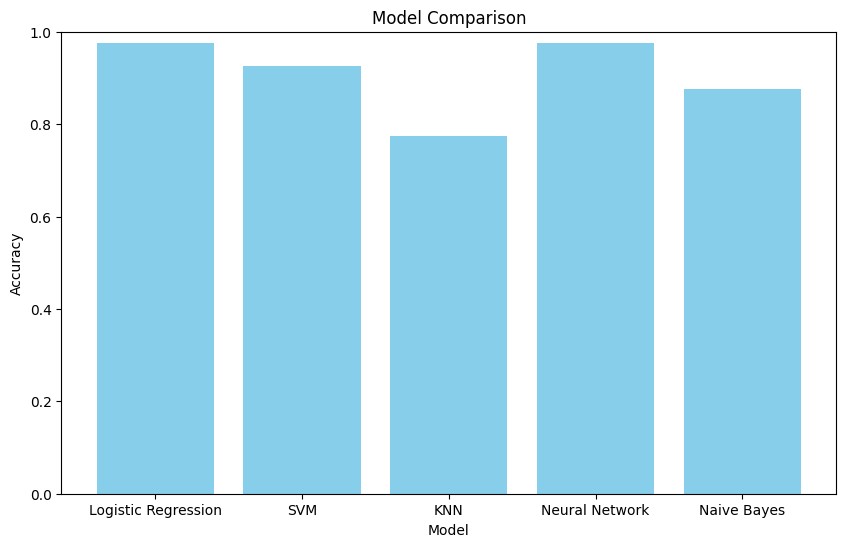

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results1['Model'], results1['Accuracy'], color='skyblue')
plt.title('Model Comparison after')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

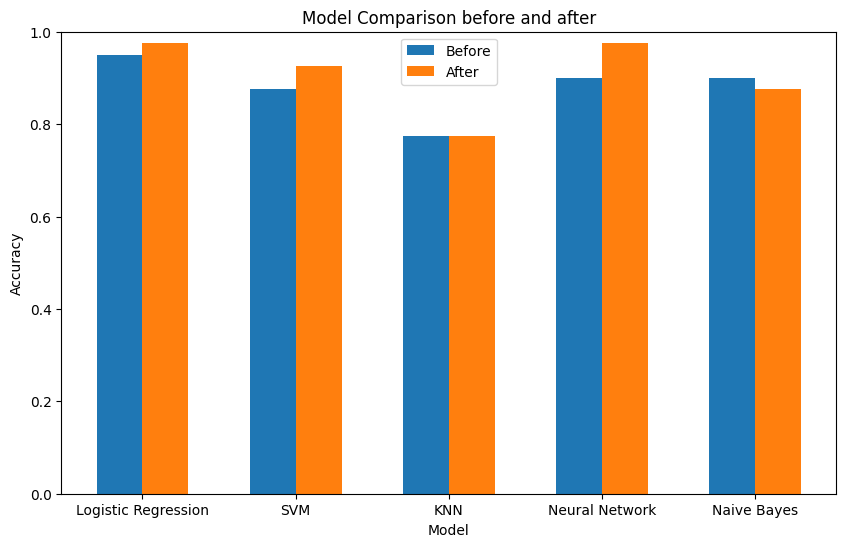

In [ ]:



ind = np.arange(5)
width = 0.3 

plt.figure(figsize=(10,6))

plt.bar(ind,results['Accuracy'],width = 0.3 ,label = "Before")
plt.bar(ind+width,results1['Accuracy'],width = 0.3 ,label = "After") # A bar chart
plt.xticks(ind + width / 2, results['Model'])
plt.legend()

plt.title('Model Comparison before and after')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aca826a4-29da-4c89-a1a1-cea40d4f679a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>